
# Neural Network from scratch Using Numpy and Pandas with MNIST Dataset

This notebook serves as a step-by-step tutorial on building a neural network using only NumPy and Pandas, focusing on the MNIST dataset. 

## Overview

We will construct a neural network from scratch using only fundamental Python libraries like NumPy and Pandas. The neural network will be trained on the MNIST dataset, which contains handwritten digits. The architecture of the neural network will consist of a single hidden layer with 20 hidden units and an output layer with 10 units corresponding to the 10 possible classes (digits 0 through 9).

## Key Components

- **Data Preprocessing**: We will preprocess the MNIST dataset using Pandas and NumPy, ensuring that the input matrix X has examples stacked in columns.

- **Neural Network Architecture**: The neural network will consist of an input layer, a hidden layer with 20 units, and an output layer with 10 units. We will explain the mathematical formulation of each layer and the activation functions used.

- **Forward Propagation**: We will demonstrate the forward propagation process, where input data is passed through the neural network to produce predictions. Each step of the forward propagation will be explained with relevant mathematical equations.

- **Backward Propagation**: The backpropagation algorithm will be explained in detail, showing how gradients are calculated for updating the model parameters (weights and biases). 

- **Loss Function**: We will use categorical cross-entropy as the loss function, which measures the difference between predicted probabilities and true labels. 





## Mathematical Equations

### Forward Propagation
The forward propagation computes the output of the neural network given the input features.

$$
Z^{[1]} = W^{[1]} X + b^{[1]} \\
A^{[1]} = \text{ReLU}(Z^{[1]}) \\
Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} \\
A^{[2]} = \text{softmax}(Z^{[2]})
$$

- \( X \) : Input matrix (784 x number of examples)
- $( Z^{[1]} ) $: Output of the first hidden layer before activation
- $( A^{[1]} )$ : Output of the first hidden layer after activation (ReLU)
- $( Z^{[2]} )$ : Output of the output layer before activation
- $( A^{[2]} )$ : Output of the output layer after activation (softmax)
- $( W^{[1]} ),( W^{[2]})$ : Weights matrices for the first hidden layer and output layer, respectively
- $( b^{[1]} ),( b^{[2]})$ : Bias vectors for the first hidden layer and output layer, respectively


### Backward Propagation
The backward propagation computes the gradients of the loss function with respect to the parameters of the neural network.

$$
\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = A^{[2]} - Y \\
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial Z^{[2]}} A^{[1]}.T \\
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \\
\frac{\partial \mathcal{L}}{\partial Z^{[1]}} = W^{[2]}.T \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \odot (Z^{[1]} > 0) \\
\frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial Z^{[1]}} X.T \\
\frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial Z^{[1]}}
$$

- $ \mathcal{L} $ : Loss function (categorical cross-entropy)
- $ m $ : Number of examples in the training set
- $ \odot $ : Element-wise multiplication
- $ X $ : Input matrix
- $ Y $ : True labels (one-hot encoded)
- $ W^{[1]} $, $ W^{[2]} $ : Weights matrices for the first hidden layer and output layer, respectively
- $ b^{[1]} $, $ b^{[2]} $ : Bias vectors for the first hidden layer and output layer, respectively





In [1]:
import numpy as np
import pandas as pd



In [2]:
# Read the MNIST data 
df = pd.read_csv("mnist-dataset/train.csv")

df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


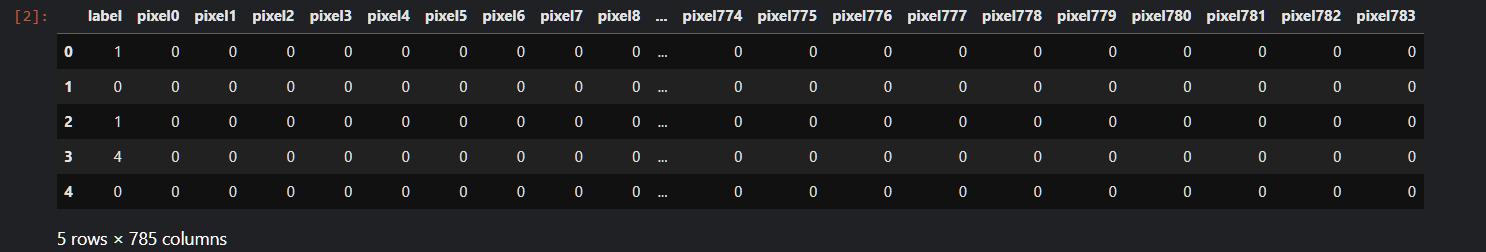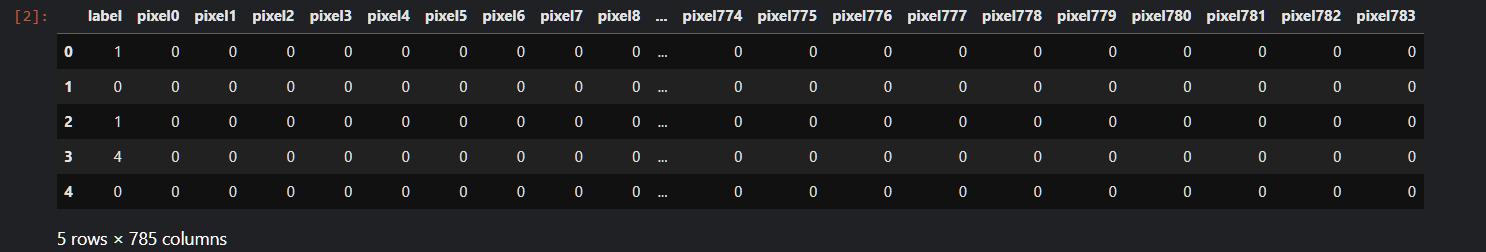Here each example is stacked as a row . Where first coloumn is ground true label and rest of 784 coloumns are pixel values . 


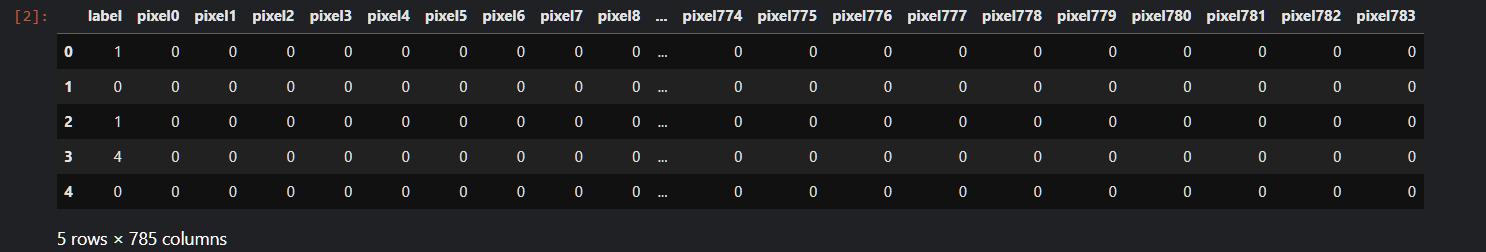


Later , we will put all pixel values in coloumns so each coloumn will become an example . 
But before that lets split our data set into train and evaluate sets . 
TO do that lets first shuffle our data set and then take out 80% of data for training and 20% of data for evaluation . 

In [3]:
# Convert df to numpy array 
data = df.values 

data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

`np.random.shuffle(data)` shuffles the elements of the array `data` along the first axis, which means it shuffles the rows of the array. This operation rearranges the rows randomly, effectively shuffling the order of the examples in the dataset.

So, if `data` is a 2D array representing a DataFrame where each row corresponds to a data example and each column corresponds to a feature or label, `np.random.shuffle(data)` will shuffle the rows (examples) of the array, maintaining the integrity of each example (i.e., not shuffling individual elements within an example).

In [4]:
# Lets set seed to ensure reproducibility of the shuffling process
np.random.seed(42)

# Shuffle data 
np.random.shuffle(data)

data

array([[8, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Split the shuffled data into train and evaluate sets
- train_size = int(0.8 * len(data)) -> 0.8 * 42000 is 80% of 42000 . 
- train_data = data[:train_size]  -> take 80% data for training .
- eval_data = data[train_size:]  ->  take remaining data for evaluation purpose .

In [5]:
# Split the shuffled data into train and evaluate sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
eval_data = data[train_size:]

In [6]:
train_data , eval_data

(array([[8, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [9, 0, 0, ..., 0, 0, 0],
        ...,
        [8, 0, 0, ..., 0, 0, 0],
        [5, 0, 0, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0]]),
 array([[5, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))


# Extract labels and features for training data
- y_train = train_data[:, 0]
- X_train = train_data[:, 1:].T / 255.0  # Normalize pixel values and transpose

# Extract labels and features for evaluation data
- y_eval = eval_data[:, 0]
- X_eval = eval_data[:, 1:].T / 255.0  # Normalize pixel values and transpose
```

Here's what each line does:

1. `y_train = train_data[:, 0]`: Extracts labels from the `train_data` array. It selects all rows and the first column, storing the labels in `y_train`.

2. `X_train = train_data[:, 1:].T / 255.0`: Extracts features from the `train_data` array. It selects all rows and all columns starting from the second column, then transposes the resulting matrix. Additionally, it normalizes the pixel values by dividing them by 255.0, which is the maximum pixel value for grayscale images. The normalized features are stored in `X_train`.

3. `y_eval = eval_data[:, 0]`: Extracts labels from the `eval_data` array in a similar manner to the `train_data`. It selects all rows and the first column, storing the labels in `y_eval`.

4. `X_eval = eval_data[:, 1:].T / 255.0`: Extracts features from the `eval_data` array, similar to the process for the training data. It selects all rows and all columns starting from the second column, then transposes the resulting matrix. Additionally, it normalizes the pixel values by dividing them by 255.0, which is the maximum pixel value for grayscale images. The normalized features are stored in `X_eval`.

In [7]:
# Extract labels and features for training data
y_train = train_data[:, 0]
X_train = train_data[:, 1:].T / 255.0  # Normalize pixel values and transpose

# Extract labels and features for evaluation data
y_eval = eval_data[:, 0]
X_eval = eval_data[:, 1:].T / 255.0  # Normalize pixel values and transpose


In [8]:
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}, number of training examples to train : {X_train.shape[1]}")
print(f"Shape of X_eval: {X_eval.shape}, Shape of y_eval: {y_eval.shape}, number of examples for evaluation are: {X_eval.shape[1]}")

Shape of X_train: (784, 33600), Shape of y_train: (33600,), number of training examples to train : 33600
Shape of X_eval: (784, 8400), Shape of y_eval: (8400,), number of examples for evaluation are: 8400


**Let's visualize the distribution of classes using a bar plot.
Each bar represents a unique class, and its height corresponds to the count of examples in that class.**

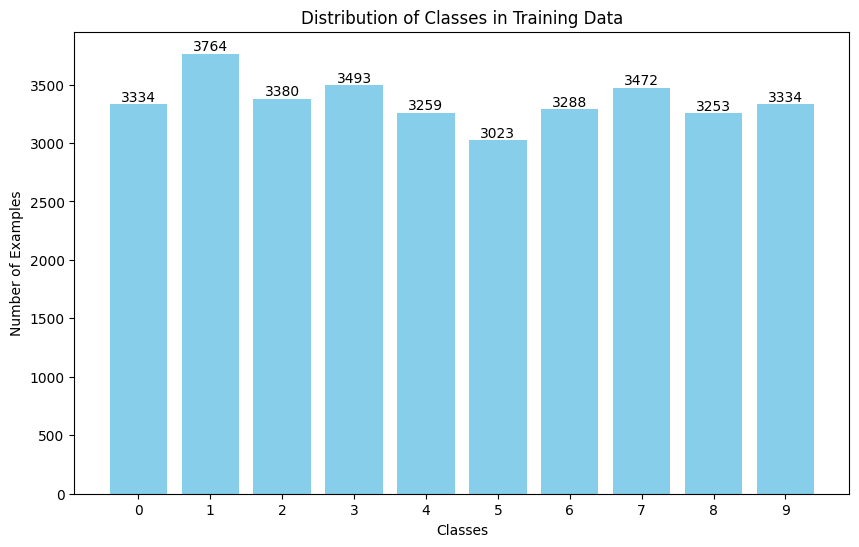

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each class for training data
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_classes, class_counts, color='skyblue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.title('Distribution of Classes in Training Data')
plt.xticks(unique_classes)

# Annotate each bar with the number of examples
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

# Show plot
plt.show()




**Lets do same for evaluation data**

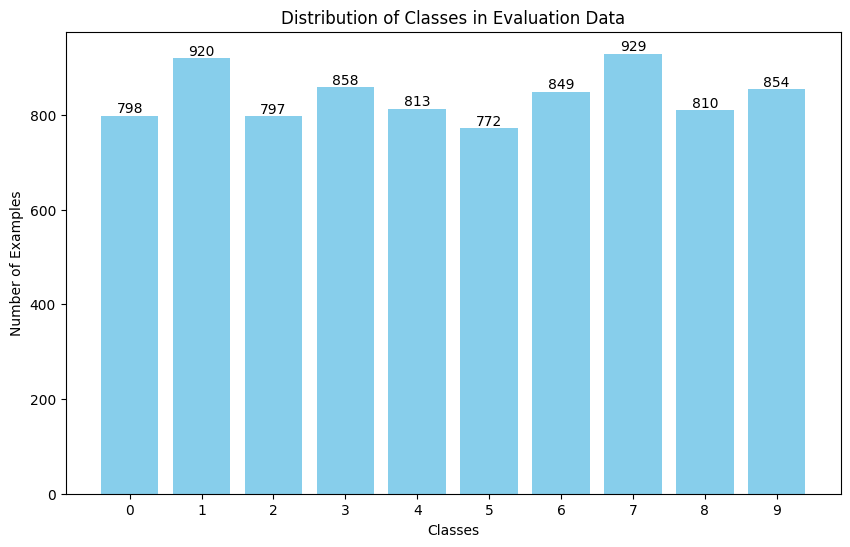

In [10]:
# Count occurrences of each class for evaluation data
unique_classes, class_counts = np.unique(y_eval, return_counts=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_classes, class_counts, color='skyblue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.title('Distribution of Classes in Evaluation Data')
plt.xticks(unique_classes)

# Annotate each bar with the number of examples
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

# Show plot
plt.show()

### Its time to one-hot-encode our labels  . 

## Why One-Hot Encoding?

- **Handling Categorical Data**: Categorical variables can't be directly used in numerical computations.
  
- **Binary Representation**: One-hot encoding represents categories as binary vectors, with one element hot (1) and others cold (0).

- **Independence**: Ensures each category's representation is independent, avoiding misleading ordinal relationships.

- **Compatibility**: Transforms categorical data into a format compatible with many machine learning algorithms.

- **Preservation of Information**: Maintains original category information, allowing models to differentiate between categories.

One-hot encoding is essential for preprocessing categorical data, enabling its use in machine learning algorithms effectively.


**For those who are new to one-hot-encoding , here is an example.**


## Example of One-Hot Encoding with MNIST Dataset

Consider a dataset containing images of handwritten digits from 0 to 9, known as the MNIST dataset.

### Before One-Hot Encoding:

The dataset includes images of handwritten digits along with their corresponding labels. For example:

| Image (Example) | Label |
|-----------------|-------|
| Handwritten digit image 1 | 5 |
| Handwritten digit image 2 | 0 |
| Handwritten digit image 3 | 9 |
| Handwritten digit image 4 | 3 |
| Handwritten digit image 5 | 7 |

### After One-Hot Encoding:

To use the labels in machine learning algorithms, they are often one-hot encoded. For example:

| Image (Example) | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|-----------------|---|---|---|---|---|---|---|---|---|---|
| Handwritten digit image 1 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| Handwritten digit image 2 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| Handwritten digit image 3 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |
| Handwritten digit image 4 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| Handwritten digit image 5 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 |

Each image label is now represented by a binary vector, with one element hot (1) indicating the presence of the corresponding digit.

This one-hot encoded representation enables the use of the digit labels in machine learning algorithms effectively.


## One-Hot Encoding of Train Labels

Following code demonstrates the process of one-hot encoding the train labels using numpy's `np.eye` function. Here's a step-by-step explanation:


1. **One-Hot Encoding**:
   - The one-hot encoding process is performed using the `np.eye` function.
   - `np.eye` returns a 2-D array where the diagonal elements are set to 1, and all other elements are 0.
   - The size of the resulting array is determined by the number of classes in the dataset (in this case, 10), which is the number of rows, and the number of examples in the training data, which is the number of columns.
   - `np.eye(10)` creates a 10x10 identity matrix where each row corresponds to a unique class.
   
2. **Indexing with y_train**:
   - The one-hot encoding is performed by indexing the identity matrix using the class labels from the `y_train` array.
   - Each element in `y_train` represents the class label of a corresponding example in the training data.

3. **Transpose Operation**:
   - The resulting one-hot encoded matrix is transposed using the `.T` attribute to match the desired shape of (10 x number of examples).
   - This transpose operation swaps the rows and columns of the matrix, ensuring that each column represents one example and each row represents one class.

4. **Printing Shape**:
   - The shape of the one-hot encoded matrix (`Y_train_one_hot`) is printed to the console using the `.shape` attribute.
   - This provides information about the dimensions of the one-hot encoded matrix.

5. **Final Output**:
   - The final one-hot encoded matrix (`Y_train_one_hot`) is displayed along with its shape.

This process ensures that the class labels are represented as binary vectors, where each class is uniquely identified by a vector with a single 1 and all other elements as 0s. 


In [11]:

# One-hot encode the train labels
Y_train_one_hot = np.eye(10)[y_train].T  # One-hot encoded labels for training data (10 x number of examples)
print(f"Shape of Y_train_one_hot: {Y_train_one_hot.shape}")
Y_train_one_hot

Shape of Y_train_one_hot: (10, 33600)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [12]:
# One-hot encode the evaluation labels
Y_eval_one_hot = np.eye(10)[y_eval].T  # One-hot encoded labels for training data (10 x number of examples)
print(f"Shape of Y_train_one_hot: {Y_eval_one_hot.shape}")
Y_train_one_hot

Shape of Y_train_one_hot: (10, 8400)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])


# Initialize weights and biases

1. **`input_size = X_train.shape[0]`**: Defines the input size for the neural network, which is the number of features in the training data.

2. **`hidden_size = 20`**: Defines the number of neurons in the hidden layer of the neural network.

3. **`output_size = 10`**: Defines the number of output neurons in the output layer of the neural network, which corresponds to the number of classes in the classification task.

4. **`np.random.seed(20)`**: Sets the random seed for reproducibility. This ensures that the random initialization of weights and biases will produce the same results each time the code is run.




5. **`W1 = np.random.randn(hidden_size, input_size) * 0.01`**: Initializes the weights matrix `W1` for the connection between the input layer and the hidden layer. The weights are initialized randomly from a Gaussian distribution with mean 0 and standard deviation 1, and then scaled by 0.01.

6. **`b1 = np.random.randn(hidden_size, 1)* 0.01`**: Initializes the bias vector `b1` for the hidden layer. The biases are also initialized randomly from a Gaussian distribution with mean 0 and standard deviation 1, and then scaled by 0.01.

7. **`W2 = np.random.randn(output_size, hidden_size) * 0.01`**: Initializes the weights matrix `W2` for the connection between the hidden layer and the output layer. Similar to `W1`, the weights are initialized randomly from a Gaussian distribution with mean 0 and standard deviation 1, and then scaled by 0.01.

8. **`b2 = np.random.randn(output_size, 1)* 0.01`**: Initializes the bias vector `b2` for the output layer. Similar to `b1`, the biases are initialized randomly from a Gaussian distribution with mean 0 and standard deviation 1, and then scaled by 0.01.


In [13]:
# Initialize parameters
input_size = X_train.shape[0]
hidden_size = 20
output_size = 10
np.random.seed(20)
# Initialize weights and biases
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.random.randn(hidden_size, 1)* 0.01
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.random.randn(output_size, 1)* 0.01

# Define Activation function


## ReLU activation function

1. **`def relu(Z):`**: This line defines a function named `relu` that takes one argument `Z`.

2. **`return np.maximum(0, Z)`**: This line applies the ReLU (Rectified Linear Unit) activation function element-wise to the input `Z`. ReLU function returns the maximum of 0 and `Z`, effectively setting negative values to 0 and leaving positive values unchanged.


In [14]:
# Define ReLU activation function
def relu(Z):
    return np.maximum(0, Z)


# Softmax activation function

1. **`def softmax(Z):`**: This line defines a function named `softmax` that takes one argument `Z`.

2. **`exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))`**: This line computes the exponential of each element of `Z`, but first subtracts the maximum value of `Z` along each column (`axis=0`) to prevent overflow (numerically stable softmax). This operation ensures that the largest value in `Z` becomes 0 after subtraction, which prevents exponentiation of large numbers that could cause overflow.

3. **`return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)`**: This line computes the softmax activation function by dividing each element of `exp_Z` by the sum of all elements along the same column. This operation effectively normalizes the values so that they sum up to 1, representing probabilities. 


In [15]:

# Define softmax activation function
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Numerically stable
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


# Define forward propagation


1. **def forward_propagation(X, W1, b1, W2, b2):**
   - We define a function named `forward_propagation`.
   - It takes five arguments: `X` (input data), `W1` (weights for the connection between input and hidden layer), `b1` (biases for the hidden layer), `W2` (weights for the connection between hidden and output layer), and `b2` (biases for the output layer).

2. **Compute Hidden Layer Pre-activation**:
   - Compute the pre-activation values for the hidden layer (`Z1`) by performing matrix multiplication between `W1` and `X`, then adding `b1`. 
   - This operation produces pre-activation values for each neuron in the hidden layer.

3. **Apply ReLU Activation**:
   - Apply the ReLU activation function to the pre-activation values of the hidden layer (`Z1`).
   - ReLU function sets negative values to 0 and leaves positive values unchanged.

4. **Compute Output Layer Pre-activation**:
   - Compute the pre-activation values for the output layer (`Z2`) by performing matrix multiplication between `W2` and the activation values of the hidden layer (`A1`), then adding `b2`. 
   - This operation produces pre-activation values for each neuron in the output layer.

5. **Apply Softmax Activation**:
   - Apply the softmax activation function to the pre-activation values of the output layer (`Z2`).
   - Softmax function normalizes the values so that they sum up to 1, representing probabilities of each class.

6. **Return Values**:
   - Return the pre-activation and activation values for both the hidden and output layers.
   - These values are essential for backpropagation during the training process.


In [16]:
# Define forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    
    Z1 = np.dot(W1, X) + b1  # (shape = hidden_size x num_examples)
    
    A1 = relu(Z1)  # (shape = hidden_size x num_examples)
    
    Z2 = np.dot(W2, A1) + b2  # (shape = output_size x num_examples)
   
    A2 = softmax(Z2)  # (shape = output_size x num_examples)
    
    return Z1, A1, Z2, A2


# Define categorical cross-entropy loss


1. **def compute_loss(A2, Y_one_hot):**
   - We define a function named `compute_loss`.
   - It takes two arguments: `A2` (activation values of the output layer) and `Y_one_hot` (one-hot encoded true labels).

2. **Number of Examples**:
   - We calculate the number of examples (`m`) in the dataset. This is determined by the number of columns in the `Y_one_hot` matrix.

3. **Numerical Stability**:
   - We define a small constant `epsilon` to prevent numerical instability when taking the logarithm. This constant ensures that the values to be passed to `np.log()` are not too close to 0 or 1.

4. **Clip Predictions**:
   - We apply the `np.clip()` function to the activation values `A2` to ensure that they are within a certain range defined by `epsilon` and `1 - epsilon`. This prevents taking the logarithm of values close to 0 or 1, which can cause numerical issues.

5. **Compute Loss**:
   - We compute the cross-entropy loss using the formula: 
     $$
     [
     -\frac{1}{m} \sum_{i=1}^{m} Y_{\text{one_hot}}^{(i)} \log(\hat{Y}^{(i)})
     ]
     $$
   - Here, \$( Y_{\text{one_hot}}^{(i)} \)$  represents the one-hot encoded true label for the \( i \)th example, and $ \( \hat{Y}^{(i)} \)$ represents the predicted probability distribution for the \( i \)th example.
   - We sum the losses across all examples and divide by the number of examples \( m \) to get the average loss.

6. **Return Loss**:
   - We return the computed loss value, which represents the average categorical cross-entropy loss across all examples in the dataset.

In [17]:

# Define categorical cross-entropy loss
def compute_loss(A2, Y_one_hot):
    m = Y_one_hot.shape[1]
    epsilon = 1e-15
    y_pred = np.clip(A2, epsilon, 1 - epsilon)
    
    return -np.sum(Y_one_hot * np.log(y_pred)) / m




# Define accuracy calculation

1. **def compute_accuracy(A2, Y_one_hot):**
   - We define a function named `compute_accuracy`.
   - It takes two arguments: `A2` (activation values of the output layer) and `Y_one_hot` (one-hot encoded true labels).

2. **Prediction Calculation**:
   - We use the `np.argmax()` function along `axis=0` to find the index of the maximum value in each column of the `A2` matrix. This gives us the predicted class label for each example.

3. **True Label Extraction**:
   - Similarly, we use the `np.argmax()` function along `axis=0` to find the index of the maximum value in each column of the `Y_one_hot` matrix. This gives us the true class label for each example.

4. **Accuracy Calculation**:
   - We compare the predicted labels (`predictions`) with the true labels (`true_labels`) element-wise using the equality operator `==`. This results in a boolean array where `True` indicates a correct prediction and `False` indicates an incorrect prediction.
   - We use `np.mean()` to calculate the proportion of correct predictions. Since `True` is equivalent to `1` and `False` is equivalent to `0` when used in arithmetic operations, taking the mean of the boolean array gives us the accuracy.
   - This accuracy value represents the proportion of correctly predicted examples in the dataset.

5. **Return Accuracy**:
   - We return the computed accuracy value, which represents the proportion of correctly predicted examples in the dataset.

In [18]:
# Define accuracy calculation
def compute_accuracy(A2, Y_one_hot):
    predictions = np.argmax(A2, axis=0)
    true_labels = np.argmax(Y_one_hot, axis=0)
    accuracy = np.mean(predictions == true_labels)
    return accuracy



### Backward Propagation
The backward propagation computes the gradients of the loss function with respect to the parameters of the neural network.

$$
\frac{\partial \mathcal{L}}{\partial Z^{[2]}} = A^{[2]} - Y \\
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial Z^{[2]}} A^{[1]}.T \\
\frac{\partial \mathcal{L}}{\partial b^{[2]}} = \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \\
\frac{\partial \mathcal{L}}{\partial Z^{[1]}} = W^{[2]}.T \frac{\partial \mathcal{L}}{\partial Z^{[2]}} \odot (Z^{[1]} > 0) \\
\frac{\partial \mathcal{L}}{\partial W^{[1]}} = \frac{1}{m} \frac{\partial \mathcal{L}}{\partial Z^{[1]}} X.T \\
\frac{\partial \mathcal{L}}{\partial b^{[1]}} = \frac{1}{m} \sum \frac{\partial \mathcal{L}}{\partial Z^{[1]}}
$$

- $ \mathcal{L} $ : Loss function (categorical cross-entropy)
- $ m $ : Number of examples in the training set
- $ \odot $ : Element-wise multiplication
- $ X $ : Input matrix
- $ Y $ : True labels (one-hot encoded)
- $ W^{[1]} $, $ W^{[2]} $ : Weights matrices for the first hidden layer and output layer, respectively
- $ b^{[1]} $, $ b^{[2]} $ : Bias vectors for the first hidden layer and output layer, respectively


```python
# Define backward propagation
def backward_propagation(X, Y_one_hot, Z1, A1, Z2, A2, W1, W2, b1, b2):
    m = Y_one_hot.shape[1]
```
1. **Initialize Variables**:
   - We start by initializing a variable `m` to store the number of examples in the dataset. This is obtained from the number of columns in the `Y_one_hot` matrix.

```python
    dZ2 = A2 - Y_one_hot  # (output_size x num_examples)
```
2. **Compute Derivative of Loss with respect to Z2**:
   - We compute the derivative of the loss with respect to the pre-activation values of the output layer (`Z2`). 
   - This is calculated as the difference between the activation values of the output layer (`A2`) and the true labels (`Y_one_hot`).

```python
    dW2 = np.dot(dZ2, A1.T) / m  # (output_size x hidden_size)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m  # (output_size x 1)
```
3. **Compute Gradients for W2 and b2**:
   - We compute the gradients of the loss with respect to the weights (`dW2`) and biases (`db2`) of the output layer.
   - The gradient of `W2` is computed using matrix multiplication between the derivative of the loss with respect to `Z2` (`dZ2`) and the transpose of the activation values of the hidden layer (`A1`). 
   - The gradient of `b2` is computed by summing the rows of `dZ2` and then dividing by the number of examples `m`.

```python
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0)  # (hidden_size x num_examples)
```
4. **Compute Derivative of Loss with respect to Z1**:
   - We compute the derivative of the loss with respect to the pre-activation values of the hidden layer (`Z1`). 
   - This is calculated by multiplying the transpose of `W2` with `dZ2` and element-wise multiplication with the derivative of the ReLU activation function applied to `Z1`.

```python
    dW1 = np.dot(dZ1, X.T) / m  # (hidden_size x input_size)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m  # (hidden_size x 1)
```
5. **Compute Gradients for W1 and b1**:
   - We compute the gradients of the loss with respect to the weights (`dW1`) and biases (`db1`) of the hidden layer.
   - The gradient of `W1` is computed using matrix multiplication between the derivative of the loss with respect to `Z1` (`dZ1`) and the transpose of the input data (`X`). 
   - The gradient of `b1` is computed by summing the rows of `dZ1` and then dividing by the number of examples `m`.

```python
    return dW1, db1, dW2, db2
```
6. **Return Gradients**:
   - We return the computed gradients, which represent the rate of change of the loss with respect to each parameter (weights and biases) in the neural network. These gradients will be used to update the parameters during the optimization process.

In [19]:
# Define backward propagation
def backward_propagation(X, Y_one_hot, Z1, A1, Z2, A2, W1, W2, b1, b2):
    m = Y_one_hot.shape[1]
    dZ2 = A2 - Y_one_hot  # (output_size x num_examples)
    dW2 = np.dot(dZ2, A1.T) / m  # (output_size x hidden_size)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m  # (output_size x 1)
    dZ1 = np.dot(W2.T, dZ2) * (Z1 > 0)  # (hidden_size x num_examples)
    dW1 = np.dot(dZ1, X.T) / m  # (hidden_size x input_size)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m  # (hidden_size x 1)
    return dW1, db1, dW2, db2


## Training Loop Explanation

The `training` function represents a training loop for a neural network model. Let's break down its components:

- **Function Definition**: 
  - The function `training` takes several arguments: `X_train`, `W1`, `b1`, `W2`, `b2`, `Y_train_one_hot`, `learning_rate`, and `epoch`.
  - These arguments represent the training data, weights, biases, one-hot encoded labels for training, learning rate, and the number of epochs for training.

- **Initialization**:
  - Empty lists `epochs` and `losses` are initialized to track the progress of loss over epochs.

- **Iteration Loop**: 
  - The loop iterates over the specified number of epochs (`epoch`).
  - In each iteration:
    - Forward propagation is performed on the training data to compute the pre-activation and activation values for each layer.
    - Loss is computed using the `compute_loss` function, and the loss value is appended to the `losses` list.
    - Accuracy is computed using the `compute_accuracy` function.
    - Backward propagation is performed to compute gradients of the loss with respect to each parameter.
    - Parameters (`W1`, `b1`, `W2`, `b2`) are updated using gradient descent with the provided `learning_rate`.
    - Progress is printed every 100 epochs, displaying the current epoch number, loss, and accuracy.

- **Training Completion Message**:
  - After completing all epochs, a message is printed indicating the end of training along with the final training loss and accuracy.

- **Return Values**:
  - The function returns two lists: `epochs` and `losses`, which contain the epoch numbers and corresponding loss values, respectively.

This training loop iteratively updates the parameters of the neural network to minimize the loss and improve accuracy on the training data over the specified number of epochs using the provided learning rate.


In [20]:
# Training loop
def training (X_train, W1, b1, W2, b2 , Y_train_one_hot,learning_rate ,epoch): 
    
    epochs = []
    losses = []
    for i in range(epoch):
        # Forward propagation (train data)
        Z1_train, A1_train, Z2_train, A2_train = forward_propagation(X_train, W1, b1, W2, b2)

        # Compute loss (train data)
        loss_train = compute_loss(A2_train, Y_train_one_hot)
        epochs.append(i)
        losses.append(loss_train)

        # Compute accuracy (train data)
        accuracy_train = compute_accuracy(A2_train, Y_train_one_hot)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train_one_hot, Z1_train, A1_train, Z2_train, A2_train, W1, W2, b1, b2)

        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        print(".",end = "")
        # Print progress
        if i % 100 == 0:
            print("\n")
            print(f"Iteration {i}: Loss = {loss_train}, Accuracy = {accuracy_train}")
    print(f"Training done :Training Loss = {loss_train},Training Accuracy = {accuracy_train}")
    return epochs , losses

In [21]:
epochs , losses =  training (X_train, W1, b1, W2, b2 , Y_train_one_hot , learning_rate = 0.01 ,epoch = 1001)

.

Iteration 0: Loss = 2.3026850490872293, Accuracy = 0.1025297619047619
....................................................................................................

Iteration 100: Loss = 2.3004062274228234, Accuracy = 0.19101190476190477
....................................................................................................

Iteration 200: Loss = 2.2965753586151365, Accuracy = 0.2844047619047619
....................................................................................................

Iteration 300: Loss = 2.288431160651442, Accuracy = 0.31333333333333335
....................................................................................................

Iteration 400: Loss = 2.2698756185093476, Accuracy = 0.2958928571428571
....................................................................................................

Iteration 500: Loss = 2.228541869641942, Accuracy = 0.28383928571428574
........................................................

## Plot Loss 

The `plot_loss` function is designed to visualize the loss curve over epochs. Let's break down its components:

- **Function Definition**: 
  - The function `plot_loss` takes two arguments: `epochs` and `losses`.
  - `epochs` represent the epoch numbers, and `losses` represent the corresponding loss values.

- **Plotting**: 
  - The function creates a figure and axis using `plt.subplots()`.
  - It then plots the loss values (`losses`) against the epoch numbers (`epochs`) using `ax.plot(epochs, losses, color='blue')`.

- **Axis Labels and Title**:
  - The function sets the x-axis label as 'Epoch', y-axis label as 'Loss', and the title as 'Loss vs. Epoch' using `ax.set_xlabel()`, `ax.set_ylabel()`, and `ax.set_title()` functions, respectively.

- **Grid Lines**:
  - Grid lines are displayed on the plot using `ax.grid(True)`.

- **Display Plot**:
  - Finally, the plot is displayed using `plt.show()`.

This function provides a visual representation of how the loss changes over epochs during the training process, allowing for easy analysis of the training progress.


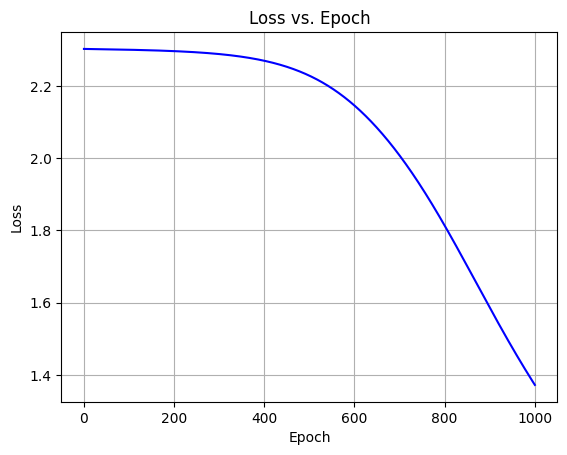

In [22]:
import matplotlib.pyplot as plt

def plot_loss(epochs , losses):
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Plot the loss vs. epoch
    ax.plot(epochs, losses,  color='blue')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Loss vs. Epoch')
    ax.grid(True)
    # Display the final plot
    plt.show()
    
plot_loss(epochs , losses)

## Evaluation Calculation 

1. **Forward Propagation**:
   - The `forward_propagation` function is called with the evaluation dataset (`X_eval`) along with the learned parameters (`W1`, `b1`, `W2`, `b2`).
   - The function returns the pre-activation and activation values of the output layer, stored in the variable `A2`.

2. **Loss Calculation**:
   - The `compute_loss` function is used to calculate the loss (`loss_eval`) based on the activation values (`A2`) obtained from forward propagation and the true labels for the evaluation dataset (`Y_eval_one_hot`).

3. **Accuracy Calculation**:
   - The `compute_accuracy` function is used to calculate the accuracy (`accuracy_eval`) based on the activation values (`A2`) obtained from forward propagation and the true labels for the evaluation dataset (`Y_eval_one_hot`).

4. **Print Evaluation Metrics**:
   - The calculated evaluation metrics, namely the loss (`loss_eval`) and accuracy (`accuracy_eval`), are printed to the console.

This code snippet evaluates the performance of the trained neural network model on the evaluation dataset by computing the loss and accuracy metrics.


In [23]:
_, _,_ , A2 = forward_propagation(X_eval, W1, b1, W2, b2)
loss_eval = compute_loss(A2, Y_eval_one_hot)
accuracy_eval = compute_accuracy(A2, Y_eval_one_hot)

print(f"Loss_eval = {loss_eval}, Accuracy_eval = {accuracy_eval}")

Loss_eval = 1.3808355408661221, Accuracy_eval = 0.6770238095238095


## Evaluation and Visualization of Single Example

This code snippet demonstrates the evaluation and visualization of a single example using a trained neural network model. Here's a breakdown of the process:

1. **Index Selection**:
   - The index of the example to be evaluated (`index`) is specified.

2. **Example Extraction**:
   - The example and its corresponding actual label are extracted from the evaluation dataset (`X_eval`, `Y_eval_one_hot`) using the specified index.

3. **Forward Propagation**:
   - Forward propagation is performed for the single example using the learned parameters (`W1`, `b1`, `W2`, `b2`) to obtain the predicted label probabilities.

4. **Label Prediction**:
   - The predicted label is determined by selecting the index of the highest probability from the output of the forward pass.

5. **Print Labels**:
   - The actual and predicted labels are printed to the console.

6. **Visualization**:
   - The example image is reshaped to 28x28 dimensions for visualization.
   - The image along with its predicted label and actual label is plotted using matplotlib.

This code allows for the evaluation of a specific example from the evaluation dataset using the trained neural network model and provides visual confirmation of the predicted and actual labels.


Actual label: 7
Predicted label: 7


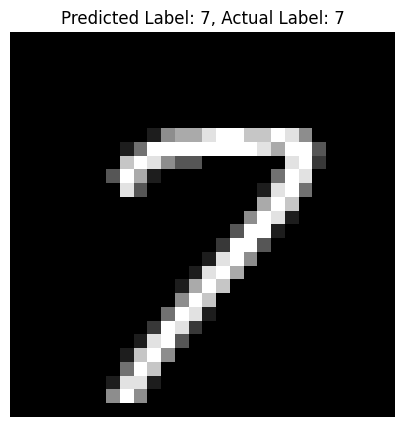

In [24]:
# Index of the example to be evaluated
index = 200

# Extract the example and actual label from the evaluation dataset
example = X_eval[:, index].reshape(-1, 1)
actual_label = np.argmax(Y_eval_one_hot[:, index])

# Perform forward propagation for the single example
_, _, _, A2 = forward_propagation(example, W1, b1, W2, b2)

# Predicted label based on the forward pass
predicted_label = np.argmax(A2)

# Print the actual label
print("Actual label:", actual_label)

# Print the predicted label
print("Predicted label:", predicted_label)

# Visualization using matplotlib
# Reshape the example data to 28x28 for plotting
example_image = example.reshape((28, 28))

# Plot the example image along with predicted and actual labels
plt.figure(figsize=(5, 5))
plt.imshow(example_image, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}, Actual Label: {actual_label}')
plt.axis('off')
plt.show()
